In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import sklearn
import matplotlib.pyplot as plt

In [71]:
df = pd.read_excel('Golbal_combined4.xlsx')

In [72]:
df.columns

Index(['Date', 'Confirmed'], dtype='object')

In [73]:
df_train, df_test = sklearn.model_selection.train_test_split(df, train_size = 0.7,random_state = 2022)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['Date', 'Confirmed']] =scaler.fit_transform(df_train[['Date', 'Confirmed']])
df_test[['Date', 'Confirmed']] = scaler.transform(df_test[['Date', 'Confirmed']])

In [75]:
df_final = df_train.append(df_test)

In [76]:
y_train = df_train['Confirmed']
x_train = df_train[['Date']]
y_test = df_test['Confirmed']
x_test = df_test[['Date']]

In [77]:
# Initializing the R2 scores, mse, mae lists
R2_scores = []
mse = []
mae = []

Utilizing the optimized models from the libraries and calculating the R2 Scores for each model on default hyper parameters

# 1. Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()             #object creation
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [79]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
print(' r2_score',r2_score(y_test,y_pred))
print('Mean Square Error',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))

 r2_score 0.526147960363551
Mean Square Error 0.47517965279223306
Mean Absolute Error 0.5407320834999719


In [80]:
R2_scores.append(r2_score(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs predicted covid cases')

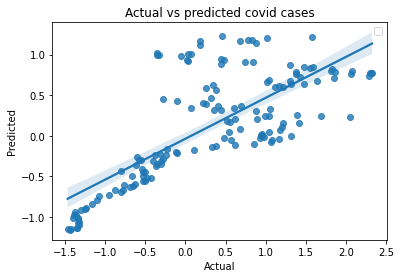

In [81]:
sns.regplot(y_test,y_pred)
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted covid cases')

# 2. SVR

In [82]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf',C = 100,gamma =100)
svr_regressor.fit(x_train,y_train)
y_pred = svr_regressor.predict(x_test)
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
print(' r2_score',r2_score(y_test,y_pred))
print('Mean Square Error',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))


 r2_score 0.8887227567980412
Mean Square Error 0.11158901379627267
Mean Absolute Error 0.2518293773409412


In [83]:
R2_scores.append(r2_score(y_test,svr_regressor.predict(x_test)))
mse.append(mean_squared_error(y_test,svr_regressor.predict(x_test)))
mae.append(mean_absolute_error(y_test,svr_regressor.predict(x_test)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs predicted covid cases')

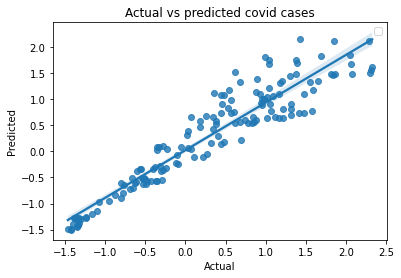

In [84]:
sns.regplot(y_test,y_pred)
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted covid cases')

# 3. XGBoosting

In [85]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
print(' r2_score',r2_score(y_test,xgb_model.predict(x_test)))
print('Mean Square Error',mean_squared_error(y_test,xgb_model.predict(x_test)))
print('Mean Absolute Error',mean_absolute_error(y_test,xgb_model.predict(x_test)))
#print('Train r2 Score',r2_score(y_train,xgb_model.predict(x_train)))

 r2_score 0.8883583957022162
Mean Square Error 0.11195439573941675
Mean Absolute Error 0.22773523646302632


In [86]:
R2_scores.append(r2_score(y_test,xgb_model.predict(x_test)))
mse.append(mean_squared_error(y_test,xgb_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,xgb_model.predict(x_test)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs predicted covid cases')

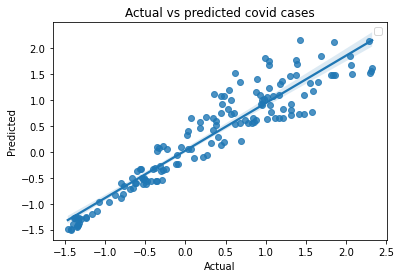

In [87]:
sns.regplot(y_test,y_pred)
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted covid cases')

# 4. RandomForest

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
print('r2_score',r2_score(y_test,rf_model.predict(x_test)))
print('Mean Square Error',mean_squared_error(y_test,rf_model.predict(x_test)))
print('Mean Absolute Error',mean_absolute_error(y_test,rf_model.predict(x_test)))
#print('Train r2 Score',r2_score(y_train,rf_model.predict(x_train)))

r2_score 0.9202072999605172
Mean Square Error 0.0800162589343421
Mean Absolute Error 0.20488063276260915


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs predicted covid cases')

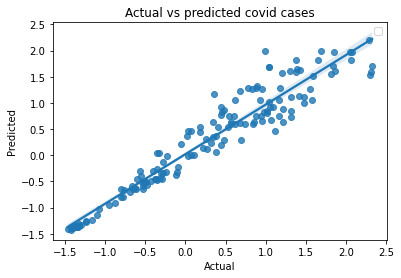

In [89]:
sns.regplot(y_test,rf_model.predict(x_test))
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted covid cases')

In [90]:
R2_scores.append(r2_score(y_test,rf_model.predict(x_test)))
mse.append(mean_squared_error(y_test,rf_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,rf_model.predict(x_test)))

# 5. Knearest Neighbor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
ex_model = KNeighborsRegressor(n_neighbors = 3)
ex_model.fit(x_train,y_train)
print('r2_score',r2_score(y_test,ex_model.predict(x_test)))
print('Mean Square Error',mean_squared_error(y_test,ex_model.predict(x_test)))
print('Mean Absolute Error',mean_absolute_error(y_test,ex_model.predict(x_test)))


r2_score 0.9087500876781229
Mean Square Error 0.09150557141781689
Mean Absolute Error 0.2182907325136611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs predicted covid cases')

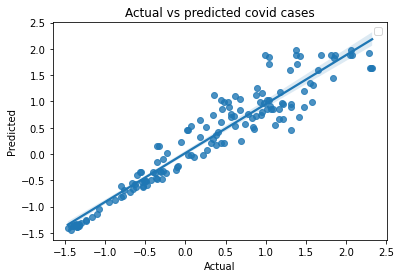

In [92]:
sns.regplot(y_test,ex_model.predict(x_test))
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted covid cases')

In [93]:
R2_scores.append(r2_score(y_test,ex_model.predict(x_test)))
mse.append(mean_squared_error(y_test,ex_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,ex_model.predict(x_test)))

# 6. Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 6)
dt_model.fit(x_train,y_train)
print('r2_score',r2_score(y_test,dt_model.predict(x_test)))
print('Mean Square Error',mean_squared_error(y_test,dt_model.predict(x_test)))
print('Mean Absolute Error',mean_absolute_error(y_test,dt_model.predict(x_test)))

r2_score 0.896814463169587
Mean Square Error 0.10347463651707423
Mean Absolute Error 0.23813580542207957


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs Predicted Covid cases')

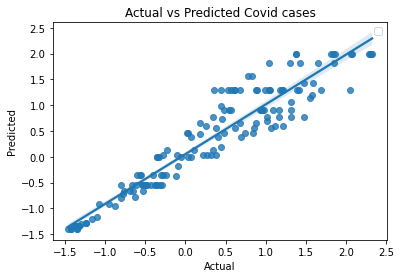

In [95]:
sns.regplot(y_test,dt_model.predict(x_test))
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Covid cases')

In [96]:
R2_scores.append(r2_score(y_test,dt_model.predict(x_test)))
mse.append(mean_squared_error(y_test,dt_model.predict(x_test)))
mae.append(mean_absolute_error(y_test,dt_model.predict(x_test)))

As the R2 scores for XGB are better than other algorithms, we plot the importance plot for XGB Model.

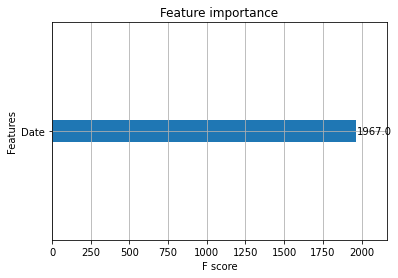

In [97]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
#reduction in mse
plot_importance(xgb_model)
plt.show()

In [98]:
import optuna
def xgb_objective(trial):
    param = {
        'silent': 1,
        'random_state': 0,
        'objective': 'reg:linear',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,100),
        'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
        'max_depth':trial.suggest_int('max_depth',3,6)
    }
    bst = xgb.XGBRegressor(**param)
    bst.fit(x_train,y_train)
    return math.sqrt(mean_squared_error(y_test,bst.predict(x_test)))

In [99]:
import math
SEED = 42
np.random.seed(SEED)
xgb_study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=SEED),pruner=optuna.pruners.SuccessiveHalvingPruner())
xgb_study.optimize(xgb_objective, n_trials=100)

[I 2022-04-04 04:03:25,960] A new study created in memory with name: no-name-fb7a1ce6-3496-4c4e-86b8-905c5960540e
[I 2022-04-04 04:03:26,010] Trial 0 finished with value: 1.022231222690214 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.024810409748678097, 'reg_alpha': 0.00042079886696066364, 'n_estimators': 24, 'learning_rste': 0.00014936568554617635, 'max_depth': 6}. Best is trial 0 with value: 1.022231222690214.
[I 2022-04-04 04:03:26,076] Trial 1 finished with value: 1.0212963808428743 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.7579479953348001, 'reg_alpha': 0.21368329072358744, 'n_estimators': 29, 'learning_rste': 0.0003511356313970409, 'max_depth': 3}. Best is trial 1 with value: 1.0212963808428743.
[I 2022-04-04 04:03:26,134] Trial 2 finished with value: 1.0151308397053163 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.0014618962793704966, 'reg_alpha': 0.0280163515871626, 'n_estimators': 22, 'learning_rste': 0.0007523742884534858, 'max_depth': 4}. B

[04:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters gettin

[I 2022-04-04 04:03:26,259] Trial 4 finished with value: 0.8597572674606412 and parameters: {'booster': 'dart', 'reg_lambda': 0.17123375973163968, 'reg_alpha': 0.001653693718282443, 'n_estimators': 18, 'learning_rste': 0.01129013355909268, 'max_depth': 4}. Best is trial 4 with value: 0.8597572674606412.
[I 2022-04-04 04:03:26,343] Trial 5 finished with value: 0.9992391076728151 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.43379206974909373, 'reg_alpha': 0.0010842262717330165, 'n_estimators': 70, 'learning_rste': 0.0008612579192594886, 'max_depth': 5}. Best is trial 4 with value: 0.8597572674606412.


[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-04-04 04:03:26,803] Trial 6 finished with value: 0.6370861871187684 and parameters: {'booster': 'dart', 'reg_lambda': 0.12604664585649453, 'reg_alpha': 0.5727904470799616, 'n_estimators': 91, 'learning_rste': 0.00621870472776908, 'max_depth': 6}. Best is trial 6 with value: 0.6370861871187684.
[I 2022-04-04 04:03:26,862] Trial 7 finished with value: 0.7339521106416342 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.0020013420622879987, 'reg_alpha': 0.0035868164986275516, 'n_estimators': 34, 'learning_rste': 0.030634622106220845, 'max_depth': 4}. Best is trial 6 with value: 0.6370861871187684.
[I 2022-04-04 04:03:26,979] Trial 8 finished with value: 0.7194962657572036 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.16172900811143134, 'reg_alpha': 0.00019870215385428647, 'n_estimators': 99, 'learning_rste': 0.020736445177905044, 'max_depth': 3}. Best is trial 6 with value: 0.6370861871187684.
[I 2022-04-04 04:03:27,023] Trial 9 finished with value: 1.0154957473243

[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters gettin

[I 2022-04-04 04:03:27,289] Trial 10 finished with value: 0.2970412323287939 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00010567900894501651, 'reg_alpha': 0.7553503645583217, 'n_estimators': 96, 'learning_rste': 0.0773715247338927, 'max_depth': 6}. Best is trial 10 with value: 0.2970412323287939.


[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:27,548] Trial 11 finished with value: 0.29676415681506885 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00014654488856579196, 'reg_alpha': 0.7600495686501338, 'n_estimators': 100, 'learning_rste': 0.09576095771652622, 'max_depth': 6}. Best is trial 11 with value: 0.29676415681506885.
[I 2022-04-04 04:03:27,772] Trial 12 finished with value: 0.2951924119470243 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00013495827625574575, 'reg_alpha': 0.9462889472525593, 'n_estimators': 80, 'learning_rste': 0.0967085494371802, 'max_depth': 6}. Best is trial 12 with value: 0.2951924119470243.


[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:27,998] Trial 13 finished with value: 0.30800703405743673 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00010359101658570359, 'reg_alpha': 0.11902935309442393, 'n_estimators': 73, 'learning_rste': 0.09807763993530157, 'max_depth': 5}. Best is trial 12 with value: 0.2951924119470243.


[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:28,257] Trial 14 finished with value: 0.3064034031184932 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0004558330288703637, 'reg_alpha': 0.9292916966794738, 'n_estimators': 74, 'learning_rste': 0.03475268550073201, 'max_depth': 5}. Best is trial 12 with value: 0.2951924119470243.


[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:28,530] Trial 15 finished with value: 0.30743710612535874 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00048434919515198736, 'reg_alpha': 0.04054540146674726, 'n_estimators': 84, 'learning_rste': 0.05524180294993796, 'max_depth': 6}. Best is trial 12 with value: 0.2951924119470243.
[I 2022-04-04 04:03:28,707] Trial 16 finished with value: 0.5302628524709216 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0004327289360016383, 'reg_alpha': 0.26091673620149664, 'n_estimators': 51, 'learning_rste': 0.01574458583727996, 'max_depth': 5}. Best is trial 12 with value: 0.2951924119470243.


[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:29,198] Trial 17 finished with value: 0.9003026291086396 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.002157439303708459, 'reg_alpha': 0.0077497527460463666, 'n_estimators': 60, 'learning_rste': 0.00232278666450748, 'max_depth': 6}. Best is trial 12 with value: 0.2951924119470243.


[04:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:29,904] Trial 18 finished with value: 0.30396235044032377 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00026813969162630574, 'reg_alpha': 0.07229899040907187, 'n_estimators': 85, 'learning_rste': 0.05009263412247017, 'max_depth': 6}. Best is trial 12 with value: 0.2951924119470243.


[04:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:30,439] Trial 19 finished with value: 0.828976141818006 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.004656492842026578, 'reg_alpha': 0.3711944089797271, 'n_estimators': 49, 'learning_rste': 0.0048701077622321, 'max_depth': 5}. Best is trial 12 with value: 0.2951924119470243.


[04:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:31,016] Trial 20 finished with value: 0.8462455899950514 and parameters: {'booster': 'dart', 'reg_lambda': 0.0012304832900727196, 'reg_alpha': 0.011002625645769976, 'n_estimators': 84, 'learning_rste': 0.0024804044355650782, 'max_depth': 6}. Best is trial 12 with value: 0.2951924119470243.
[I 2022-04-04 04:03:31,264] Trial 21 finished with value: 0.2950213020378293 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.000104894685343914, 'reg_alpha': 0.9926726958080919, 'n_estimators': 98, 'learning_rste': 0.09957976246676332, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:31,514] Trial 22 finished with value: 0.29715604267266227 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00020372530585647744, 'reg_alpha': 0.893585752829508, 'n_estimators': 92, 'learning_rste': 0.03913283952531621, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.
[I 2022-04-04 04:03:31,771] Trial 23 finished with value: 0.30788855423659395 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00017282534578637782, 'reg_alpha': 0.3091465625975471, 'n_estimators': 100, 'learning_rste': 0.09555372879126642, 'max_depth': 5}. Best is trial 21 with value: 0.2950213020378293.


[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:32,032] Trial 24 finished with value: 0.3262815819415893 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0007790835794327984, 'reg_alpha': 0.11911894160477472, 'n_estimators': 79, 'learning_rste': 0.0262953515042532, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:32,253] Trial 25 finished with value: 0.49601769513799876 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00010233066854931308, 'reg_alpha': 0.39790876026317334, 'n_estimators': 65, 'learning_rste': 0.013905070400115092, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:32,501] Trial 26 finished with value: 0.304120812809433 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002618607613834516, 'reg_alpha': 0.19435795792301194, 'n_estimators': 89, 'learning_rste': 0.07087934389620701, 'max_depth': 5}. Best is trial 21 with value: 0.2950213020378293.
[I 2022-04-04 04:03:32,721] Trial 27 finished with value: 0.3250975736351855 and parameters: {'booster': 'dart', 'reg_lambda': 0.00524684501226499, 'reg_alpha': 0.5148506147661761, 'n_estimators': 41, 'learning_rste': 0.04939789372530136, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:33,271] Trial 28 finished with value: 0.3676059687394312 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0008739087592252265, 'reg_alpha': 0.9933823111476064, 'n_estimators': 79, 'learning_rste': 0.019953337278581878, 'max_depth': 5}. Best is trial 21 with value: 0.2950213020378293.


[04:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:34,099] Trial 29 finished with value: 0.9970105680082018 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.03056058157685999, 'reg_alpha': 0.04762045836981665, 'n_estimators': 93, 'learning_rste': 0.00031119381558033723, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:34,695] Trial 30 finished with value: 1.0137430942138423 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0036532060661616478, 'reg_alpha': 0.08418530809777723, 'n_estimators': 100, 'learning_rste': 0.00011045407954753514, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.
[I 2022-04-04 04:03:34,964] Trial 31 finished with value: 0.30023929729127274 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00010077895142288526, 'reg_alpha': 0.6264959390304443, 'n_estimators': 95, 'learning_rste': 0.09729388955009481, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:35,241] Trial 32 finished with value: 0.3046185747891767 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0001714071028586381, 'reg_alpha': 0.23029313790182557, 'n_estimators': 95, 'learning_rste': 0.06432342091679043, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.
[I 2022-04-04 04:03:35,493] Trial 33 finished with value: 0.29917636639615147 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00034370388957158924, 'reg_alpha': 0.5959153661015044, 'n_estimators': 87, 'learning_rste': 0.07217876313117297, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:35,800] Trial 34 finished with value: 0.30694108360321265 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0006418535884433322, 'reg_alpha': 0.20593758867690232, 'n_estimators': 80, 'learning_rste': 0.04078633553319246, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.


[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:36,369] Trial 35 finished with value: 0.489476396089582 and parameters: {'booster': 'dart', 'reg_lambda': 0.00017693848129310207, 'reg_alpha': 0.3757236496127797, 'n_estimators': 94, 'learning_rste': 0.009846829900095545, 'max_depth': 6}. Best is trial 21 with value: 0.2950213020378293.
[I 2022-04-04 04:03:36,575] Trial 36 finished with value: 0.35600292822214546 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.00014572071983982323, 'reg_alpha': 0.8537075789359361, 'n_estimators': 66, 'learning_rste': 0.02505496789253707, 'max_depth': 5}. Best is trial 21 with value: 0.2950213020378293.


[04:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:03:36,896] Trial 37 finished with value: 0.29595568145683837 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.0002604094556452956, 'reg_alpha': 0.00011117385617276468, 'n_estimators': 97, 'learning_rste': 0.06992097672408937, 'max_depth': 4}. Best is trial 21 with value: 0.2950213020378293.


[04:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:38,233] Trial 38 finished with value: 0.29212080751532477 and parameters: {'booster': 'dart', 'reg_lambda': 0.015043997611277973, 'reg_alpha': 0.0009507184155456567, 'n_estimators': 89, 'learning_rste': 0.05283102407263582, 'max_depth': 4}. Best is trial 38 with value: 0.29212080751532477.


[04:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:38,898] Trial 39 finished with value: 0.29045981010189154 and parameters: {'booster': 'dart', 'reg_lambda': 0.027424916373056867, 'reg_alpha': 0.00010235188724361691, 'n_estimators': 89, 'learning_rste': 0.04243393300155089, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:39,302] Trial 40 finished with value: 0.5597321149416222 and parameters: {'booster': 'dart', 'reg_lambda': 0.022604073905378084, 'reg_alpha': 0.0009493022249976294, 'n_estimators': 74, 'learning_rste': 0.010472517019057173, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:39,799] Trial 41 finished with value: 0.29206695134500116 and parameters: {'booster': 'dart', 'reg_lambda': 0.018090666668967435, 'reg_alpha': 0.00010890420647926675, 'n_estimators': 88, 'learning_rste': 0.04763398503785148, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:41,198] Trial 42 finished with value: 0.29486050823381615 and parameters: {'booster': 'dart', 'reg_lambda': 0.013125212337293649, 'reg_alpha': 0.00046337326045142193, 'n_estimators': 89, 'learning_rste': 0.03518366007186601, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:41,683] Trial 43 finished with value: 0.2992137282701827 and parameters: {'booster': 'dart', 'reg_lambda': 0.013235068766334013, 'reg_alpha': 0.00039038674765338023, 'n_estimators': 87, 'learning_rste': 0.03132826420310933, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:42,231] Trial 44 finished with value: 0.35026772795136907 and parameters: {'booster': 'dart', 'reg_lambda': 0.05561402383017123, 'reg_alpha': 0.00030047512492481336, 'n_estimators': 89, 'learning_rste': 0.019752096932664727, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:42,661] Trial 45 finished with value: 0.29811624687187765 and parameters: {'booster': 'dart', 'reg_lambda': 0.008399859182280964, 'reg_alpha': 0.00010556108423924819, 'n_estimators': 83, 'learning_rste': 0.04741360487327923, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:43,022] Trial 46 finished with value: 0.3389563376058804 and parameters: {'booster': 'dart', 'reg_lambda': 0.0196249677086306, 'reg_alpha': 0.0006610087288629816, 'n_estimators': 69, 'learning_rste': 0.027193606664556606, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:43,557] Trial 47 finished with value: 0.5913489327343 and parameters: {'booster': 'dart', 'reg_lambda': 0.04093811184309807, 'reg_alpha': 0.00019543082118445108, 'n_estimators': 91, 'learning_rste': 0.007645206222192097, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:44,308] Trial 48 finished with value: 0.2967030891665018 and parameters: {'booster': 'dart', 'reg_lambda': 0.47453956185304164, 'reg_alpha': 0.002200879033380886, 'n_estimators': 76, 'learning_rste': 0.03993424518736036, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:45,310] Trial 49 finished with value: 0.4578532463636556 and parameters: {'booster': 'dart', 'reg_lambda': 0.014935942092569088, 'reg_alpha': 0.00018269376098819511, 'n_estimators': 89, 'learning_rste': 0.014819947598248664, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.
[I 2022-04-04 04:03:45,434] Trial 50 finished with value: 1.013896586894559 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.08089429152531155, 'reg_alpha': 0.0005369982907150643, 'n_estimators': 59, 'learning_rste': 0.000328888089220176, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.
[I 2022-04-04 04:03:45,546] Trial 51 finished with value: 0.6374480037321801 and parameters: {'booster': 'dart', 'reg_lambda': 0.008110969567986029, 'reg_alpha': 0.0002641497494727352, 'n_estimators': 10, 'learning_rste': 0.057241628583678886, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-04-04 04:03:46,003] Trial 52 finished with value: 0.2970702405245115 and parameters: {'booster': 'dart', 'reg_lambda': 0.03466813959138749, 'reg_alpha': 0.002158964925054906, 'n_estimators': 82, 'learning_rste': 0.07999604770033833, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:46,440] Trial 53 finished with value: 0.3014227010810906 and parameters: {'booster': 'dart', 'reg_lambda': 0.009639681399018558, 'reg_alpha': 0.0009865750928416727, 'n_estimators': 77, 'learning_rste': 0.03406235284301414, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.
[I 2022-04-04 04:03:46,589] Trial 54 finished with value: 0.6912624364681298 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.018280517929723357, 'reg_alpha': 0.00014877495797326108, 'n_estimators': 86, 'learning_rste': 0.05646235123440307, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-04-04 04:03:46,747] Trial 55 finished with value: 0.47763378545870516 and parameters: {'booster': 'dart', 'reg_lambda': 0.05365056609476269, 'reg_alpha': 0.0044979098485808475, 'n_estimators': 27, 'learning_rste': 0.04417543178787304, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:47,324] Trial 56 finished with value: 0.7514773510189148 and parameters: {'booster': 'dart', 'reg_lambda': 0.13701800464256034, 'reg_alpha': 0.0003221754949644049, 'n_estimators': 97, 'learning_rste': 0.0038557425912445135, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:47,804] Trial 57 finished with value: 0.9531940928397407 and parameters: {'booster': 'dart', 'reg_lambda': 0.0063868780856028195, 'reg_alpha': 0.021333933364049214, 'n_estimators': 81, 'learning_rste': 0.0010063467021526361, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:49,115] Trial 58 finished with value: 0.2950335162405607 and parameters: {'booster': 'dart', 'reg_lambda': 0.20987781299309682, 'reg_alpha': 0.0006361593085496838, 'n_estimators': 92, 'learning_rste': 0.08233915197440883, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:49,576] Trial 59 finished with value: 0.9042763859174023 and parameters: {'booster': 'dart', 'reg_lambda': 0.3425417837711249, 'reg_alpha': 0.00055958705637915, 'n_estimators': 91, 'learning_rste': 0.001756392515342083, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:50,275] Trial 60 finished with value: 0.34629693425540203 and parameters: {'booster': 'dart', 'reg_lambda': 0.0028909466760801746, 'reg_alpha': 0.0015653253473363004, 'n_estimators': 98, 'learning_rste': 0.02311141017163987, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:52,283] Trial 61 finished with value: 0.30717443204581313 and parameters: {'booster': 'dart', 'reg_lambda': 0.6925998327505788, 'reg_alpha': 0.00015086686247709597, 'n_estimators': 92, 'learning_rste': 0.08300231859061166, 'max_depth': 5}. Best is trial 39 with value: 0.29045981010189154.
[I 2022-04-04 04:03:52,453] Trial 62 finished with value: 0.7007474900039741 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.09294830441820505, 'reg_alpha': 0.00023768663753838434, 'n_estimators': 86, 'learning_rste': 0.05799023126071954, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-04-04 04:03:53,061] Trial 63 finished with value: 0.2998896402696497 and parameters: {'booster': 'dart', 'reg_lambda': 0.28597682933328167, 'reg_alpha': 0.0004072568554987834, 'n_estimators': 89, 'learning_rste': 0.0942358304733745, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:53,719] Trial 64 finished with value: 0.3053738754492303 and parameters: {'booster': 'dart', 'reg_lambda': 0.01198803019798901, 'reg_alpha': 0.0038097670898932937, 'n_estimators': 94, 'learning_rste': 0.06625875176039066, 'max_depth': 5}. Best is trial 39 with value: 0.29045981010189154.


[04:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:54,374] Trial 65 finished with value: 0.32244412262622113 and parameters: {'booster': 'dart', 'reg_lambda': 0.0016161220270818906, 'reg_alpha': 0.0007917429594423075, 'n_estimators': 83, 'learning_rste': 0.033666086586297855, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:56,154] Trial 66 finished with value: 0.9746386949657703 and parameters: {'booster': 'dart', 'reg_lambda': 0.9747697911636747, 'reg_alpha': 0.00138163037739191, 'n_estimators': 97, 'learning_rste': 0.0006036479620723733, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.
[I 2022-04-04 04:03:56,398] Trial 67 finished with value: 0.5695807569796997 and parameters: {'booster': 'dart', 'reg_lambda': 0.026819167643295228, 'reg_alpha': 0.0064616484696568, 'n_estimators': 43, 'learning_rste': 0.017353832661671374, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:56,552] Trial 68 finished with value: 0.6925736235516631 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.005646851702371258, 'reg_alpha': 0.015560880775356216, 'n_estimators': 72, 'learning_rste': 0.045498010183550576, 'max_depth': 5}. Best is trial 39 with value: 0.29045981010189154.


[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by lan

[I 2022-04-04 04:03:57,163] Trial 69 finished with value: 0.3011609091207284 and parameters: {'booster': 'dart', 'reg_lambda': 0.01617410308665357, 'reg_alpha': 0.0005576302207495893, 'n_estimators': 100, 'learning_rste': 0.07748395154269333, 'max_depth': 3}. Best is trial 39 with value: 0.29045981010189154.


[04:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:57,577] Trial 70 finished with value: 0.29409009076355747 and parameters: {'booster': 'dart', 'reg_lambda': 0.22154160434514983, 'reg_alpha': 0.002730914042960194, 'n_estimators': 77, 'learning_rste': 0.06182245722194605, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:57,999] Trial 71 finished with value: 0.2920648941157918 and parameters: {'booster': 'dart', 'reg_lambda': 0.1920918366560576, 'reg_alpha': 0.002134158569176906, 'n_estimators': 77, 'learning_rste': 0.055649068272167236, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:03:58,842] Trial 72 finished with value: 0.2914262315610912 and parameters: {'booster': 'dart', 'reg_lambda': 0.2336518434241209, 'reg_alpha': 0.002231189365573257, 'n_estimators': 76, 'learning_rste': 0.05442384561924451, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:00,240] Trial 73 finished with value: 0.295872046777315 and parameters: {'booster': 'dart', 'reg_lambda': 0.20269163808698307, 'reg_alpha': 0.0025259855327298096, 'n_estimators': 77, 'learning_rste': 0.038319561312685886, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:00,624] Trial 74 finished with value: 0.32901229310101787 and parameters: {'booster': 'dart', 'reg_lambda': 0.11167585670253699, 'reg_alpha': 0.0032987398454980567, 'n_estimators': 68, 'learning_rste': 0.029765901882377217, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:01,016] Trial 75 finished with value: 0.29138077809349844 and parameters: {'booster': 'dart', 'reg_lambda': 0.4806459264045042, 'reg_alpha': 0.005332090680760781, 'n_estimators': 71, 'learning_rste': 0.05505947629282634, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:01,331] Trial 76 finished with value: 0.2977948346110201 and parameters: {'booster': 'dart', 'reg_lambda': 0.5748885591041134, 'reg_alpha': 0.006113330892852011, 'n_estimators': 61, 'learning_rste': 0.04932533903947585, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:01,732] Trial 77 finished with value: 0.29197921714203906 and parameters: {'booster': 'dart', 'reg_lambda': 0.30719188467356306, 'reg_alpha': 0.0028306784966968886, 'n_estimators': 71, 'learning_rste': 0.05629062418564499, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:02,125] Trial 78 finished with value: 0.29110506622884136 and parameters: {'booster': 'dart', 'reg_lambda': 0.3142721583199121, 'reg_alpha': 0.0030243379752242262, 'n_estimators': 72, 'learning_rste': 0.054491191470967676, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:03,647] Trial 79 finished with value: 0.3927710905969911 and parameters: {'booster': 'dart', 'reg_lambda': 0.34950041816669924, 'reg_alpha': 0.009196013207411246, 'n_estimators': 63, 'learning_rste': 0.02301469783319494, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:04,301] Trial 80 finished with value: 0.2936249630558113 and parameters: {'booster': 'dart', 'reg_lambda': 0.47141341421240973, 'reg_alpha': 0.004856444600630954, 'n_estimators': 67, 'learning_rste': 0.05067337473889921, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:04,652] Trial 81 finished with value: 0.29241027489837174 and parameters: {'booster': 'dart', 'reg_lambda': 0.45264965536816704, 'reg_alpha': 0.004907333460196582, 'n_estimators': 72, 'learning_rste': 0.053000464085259276, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:05,110] Trial 82 finished with value: 0.2957119004790673 and parameters: {'booster': 'dart', 'reg_lambda': 0.27130596325722667, 'reg_alpha': 0.0013041906984107906, 'n_estimators': 71, 'learning_rste': 0.043633252083027756, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:05,638] Trial 83 finished with value: 0.3228079697070885 and parameters: {'booster': 'dart', 'reg_lambda': 0.42498383080640706, 'reg_alpha': 0.0016852817279556936, 'n_estimators': 74, 'learning_rste': 0.02922667464544874, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:05,928] Trial 84 finished with value: 0.29147612468173945 and parameters: {'booster': 'dart', 'reg_lambda': 0.8834728493398685, 'reg_alpha': 0.0030746212638797735, 'n_estimators': 56, 'learning_rste': 0.06679510093653479, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:06,286] Trial 85 finished with value: 0.29332626227707564 and parameters: {'booster': 'dart', 'reg_lambda': 0.8736638052618129, 'reg_alpha': 0.001960726853013715, 'n_estimators': 55, 'learning_rste': 0.06565276558125654, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:07,119] Trial 86 finished with value: 0.33500804005336954 and parameters: {'booster': 'dart', 'reg_lambda': 0.6431684158269408, 'reg_alpha': 0.003212991107239227, 'n_estimators': 50, 'learning_rste': 0.039848716023708354, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:07,985] Trial 87 finished with value: 0.2917744299520307 and parameters: {'booster': 'dart', 'reg_lambda': 0.5759726145016308, 'reg_alpha': 0.012560784127356391, 'n_estimators': 63, 'learning_rste': 0.07154464136958835, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:08,273] Trial 88 finished with value: 0.29064481186538155 and parameters: {'booster': 'dart', 'reg_lambda': 0.8267366186478909, 'reg_alpha': 0.0143515580498466, 'n_estimators': 56, 'learning_rste': 0.0739299385860508, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:08,542] Trial 89 finished with value: 0.2913344537803997 and parameters: {'booster': 'dart', 'reg_lambda': 0.8353916161825052, 'reg_alpha': 0.01720442623351006, 'n_estimators': 56, 'learning_rste': 0.07348440319862665, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:08,835] Trial 90 finished with value: 0.29190068474098785 and parameters: {'booster': 'dart', 'reg_lambda': 0.8201063760013729, 'reg_alpha': 0.011523145256749431, 'n_estimators': 56, 'learning_rste': 0.07427795590297546, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:09,123] Trial 91 finished with value: 0.2911391780008074 and parameters: {'booster': 'dart', 'reg_lambda': 0.8193847535630464, 'reg_alpha': 0.010699933179532264, 'n_estimators': 56, 'learning_rste': 0.08399492448236552, 'max_depth': 4}. Best is trial 39 with value: 0.29045981010189154.


[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:09,405] Trial 92 finished with value: 0.29033400378966506 and parameters: {'booster': 'dart', 'reg_lambda': 0.7740530794510697, 'reg_alpha': 0.014379359327345178, 'n_estimators': 55, 'learning_rste': 0.08392144558095047, 'max_depth': 4}. Best is trial 92 with value: 0.29033400378966506.
[I 2022-04-04 04:04:09,650] Trial 93 finished with value: 0.290409593805331 and parameters: {'booster': 'dart', 'reg_lambda': 0.5763910356393874, 'reg_alpha': 0.014693103256726518, 'n_estimators': 47, 'learning_rste': 0.0906982587508769, 'max_depth': 4}. Best is trial 92 with value: 0.29033400378966506.


[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:09,892] Trial 94 finished with value: 0.2908939736821976 and parameters: {'booster': 'dart', 'reg_lambda': 0.9866168670448429, 'reg_alpha': 0.025726774802881144, 'n_estimators': 45, 'learning_rste': 0.08845585932305655, 'max_depth': 4}. Best is trial 92 with value: 0.29033400378966506.


[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:10,137] Trial 95 finished with value: 0.2924756805311049 and parameters: {'booster': 'dart', 'reg_lambda': 0.5499712771145792, 'reg_alpha': 0.03300307793866319, 'n_estimators': 46, 'learning_rste': 0.09993228093072827, 'max_depth': 4}. Best is trial 92 with value: 0.29033400378966506.


[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language binding

[I 2022-04-04 04:04:10,709] Trial 96 finished with value: 0.29503275592671324 and parameters: {'booster': 'dart', 'reg_lambda': 0.7748313194450863, 'reg_alpha': 0.02123256012477444, 'n_estimators': 37, 'learning_rste': 0.0854184868629626, 'max_depth': 4}. Best is trial 92 with value: 0.29033400378966506.


[04:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:11,840] Trial 97 finished with value: 0.2882940832357896 and parameters: {'booster': 'dart', 'reg_lambda': 0.39483208482642085, 'reg_alpha': 0.016197368592298905, 'n_estimators': 53, 'learning_rste': 0.08128272780131121, 'max_depth': 4}. Best is trial 97 with value: 0.2882940832357896.
[I 2022-04-04 04:04:12,174] Trial 98 finished with value: 0.2913438383229614 and parameters: {'booster': 'dart', 'reg_lambda': 0.38531642403302707, 'reg_alpha': 0.015931063777006725, 'n_estimators': 47, 'learning_rste': 0.08345779776732971, 'max_depth': 4}. Best is trial 97 with value: 0.2882940832357896.


[04:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-04 04:04:12,311] Trial 99 finished with value: 0.8264444669865278 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.9757800538962283, 'reg_alpha': 0.051419552512145174, 'n_estimators': 53, 'learning_rste': 0.09190387481453728, 'max_depth': 4}. Best is trial 97 with value: 0.2882940832357896.


[04:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [100]:
from typing import Callable
from typing import Optional

import numpy as np

from optuna._experimental import experimental
from optuna.logging import get_logger
from optuna.study import Study
from optuna.study import StudyDirection
from optuna.trial import FrozenTrial
from optuna.trial import TrialState
from optuna.visualization._utils import _check_plot_args
from optuna.visualization.matplotlib._matplotlib_imports import _imports
if _imports.is_successful():
    from optuna.visualization.matplotlib._matplotlib_imports import Axes
    from optuna.visualization.matplotlib._matplotlib_imports import plt

_logger = get_logger(__name__)

User defined function to visualize the optimization History

In [101]:
def optimization_history(
    study: Study,
    *,
    target: Optional[Callable[[FrozenTrial], float]] = None,
    target_name: str = "Objective Value",
) -> "Axes":
    """Plot optimization history of all trials in a study with Matplotlib.
    .. seealso::
        Please refer to :func:`optuna.visualization.plot_optimization_history` for an example.
    Example:
        The following code snippet shows how to plot optimization history.
        .. plot::
            import optuna
            def objective(trial):
                x = trial.suggest_float("x", -100, 100)
                y = trial.suggest_categorical("y", [-1, 0, 1])
                return x ** 2 + y
            sampler = optuna.samplers.TPESampler(seed=10)
            study = optuna.create_study(sampler=sampler)
            study.optimize(objective, n_trials=10)
            optuna.visualization.matplotlib.plot_optimization_history(study)
    Args:
        study:
            A :class:`~optuna.study.Study` object whose trials are plotted for their target values.
        target:
            A function to specify the value to display. If it is :obj:`None` and ``study`` is being
            used for single-objective optimization, the objective values are plotted.
            .. note::
                Specify this argument if ``study`` is being used for multi-objective optimization.
        target_name:
            Target's name to display on the axis label and the legend.
    Returns:
        A :class:`matplotlib.axes.Axes` object.
    Raises:
        :exc:`ValueError`:
            If ``target`` is :obj:`None` and ``study`` is being used for multi-objective
            optimization.
    """

    _imports.check()
    _check_plot_args(study, target, target_name)
    get_optimization_history_plot(study, target, target_name)
    return 0
def get_optimization_history_plot(
    study: Study,
    target: Optional[Callable[[FrozenTrial], float]],
    target_name: str,
) -> "Axes":

    # Set up the graph style.
    fig = plt.figure()
    plt.title("Optimization History Plot")
    plt.xlabel("#Trials")
    plt.ylabel(target_name)
    
    # Prepare data for plotting.
    trials = [t for t in study.trials if t.state == TrialState.COMPLETE]

    if len(trials) == 0:
        _logger.warning("Study instance does not contain trials.")
        return 0

    # Draw a scatter plot and a line plot.
    if target is None:
        if study.direction == StudyDirection.MINIMIZE:
            best_values = np.minimum.accumulate([t.value for t in trials])
        else:
            best_values = np.maximum.accumulate([t.value for t in trials])
        plt.scatter(
            x=[t.number for t in trials],
            y=[t.value for t in trials],
            color='blue',
            alpha=1,
            label=target_name,
        )
        plt.plot(
            [t.number for t in trials],
            best_values,
            marker="o",
            color='red',
            alpha=0.5,
            label="Best Value",
        )

        plt.legend()
    else:
        plt.scatter(
            x=[t.number for t in trials],
            y=[target(t) for t in trials],
            color='red',
            alpha=1,
            label=target_name,
        )
    plt.savefig('pd_opt_his.png',dpi = 1200,bbox_inches='tight')
    plt.show()

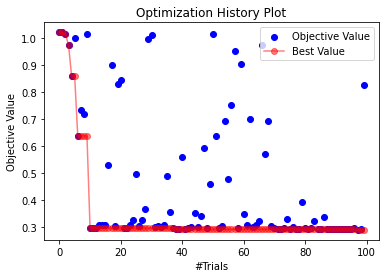

0

In [102]:
optimization_history(xgb_study)

In [103]:
#Best parameters in XGB Algorithm
xgb_study.best_params

{'booster': 'dart',
 'reg_lambda': 0.39483208482642085,
 'reg_alpha': 0.016197368592298905,
 'n_estimators': 53,
 'learning_rste': 0.08128272780131121,
 'max_depth': 4}

In [104]:
bst_params = {'booster': 'dart',
 'learning_rste': 0.08431999435293178,
 'max_depth': 3,
 'n_estimators': 96,
 'reg_alpha': 0.18831483356463694,
 'reg_lambda': 0.008820235477570784}

In [105]:
final_model = xgb.XGBRegressor(**bst_params)
final_model.fit(x_train,y_train)

[04:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rste" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             learning_rste=0.08431999435293178, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=96, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.18831483356463694,
             reg_lambda=0.008820235477570784, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
print(r2_score(y_test,final_model.predict(x_test)))
print(mean_absolute_error(y_test,final_model.predict(x_test)))
print(math.sqrt(mean_squared_error(y_test,final_model.predict(x_test))))

0.9017736021788606
0.22399826907804388
0.3138496507228906


In [107]:
print(r2_score(y_train,final_model.predict(x_train)))

0.9844311961941978


In [108]:
y_pred_final_xgb = final_model.predict(df_final[['Date']])

In [109]:
y_pred_final_xgb_list = list(y_pred_final_xgb)

In [110]:
df_final['Pred'] = y_pred_final_xgb_list

Actual vs Predicted plots using optimized Hyperparameters in XGB Algorithm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Actual vs Predicted covid cases')

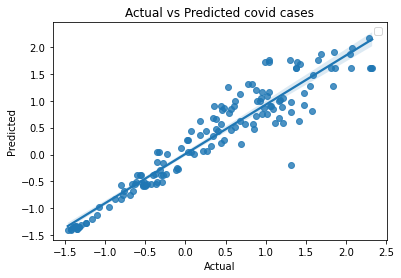

In [111]:
sns.regplot(y_test,final_model.predict(x_test))
plt.legend()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted covid cases')

In [112]:
R2_scores

[0.526147960363551,
 0.8887227567980412,
 0.8883583957022162,
 0.9202072999605172,
 0.9087500876781229,
 0.896814463169587]

In [113]:
mse

[0.47517965279223306,
 0.11158901379627267,
 0.11195439573941675,
 0.0800162589343421,
 0.09150557141781689,
 0.10347463651707423]

In [114]:
mae

[0.5407320834999719,
 0.2518293773409412,
 0.22773523646302632,
 0.20488063276260915,
 0.2182907325136611,
 0.23813580542207957]

In [115]:
metrics = pd.DataFrame({'Algorithms' : ['LR','SVR','XGB','RF','KNN','DT'],
    'R2_Scores' : R2_scores,
                        'mse' :mse,
                        'mae': mae})

In [116]:
metrics1 = metrics.sort_values(by = 'R2_Scores', ascending = False)

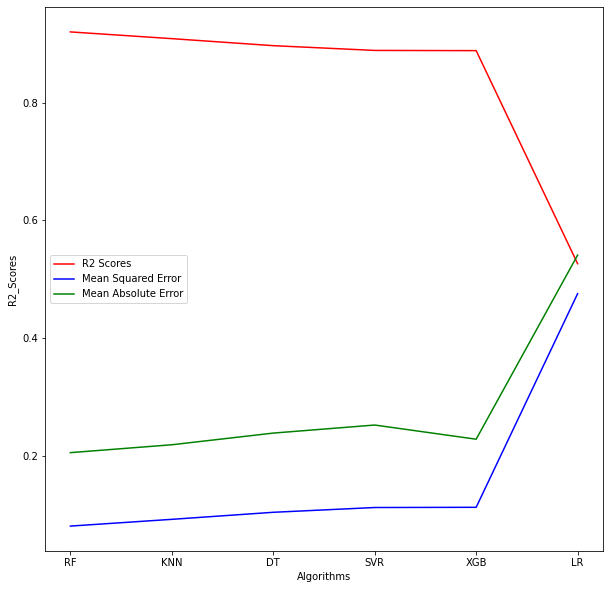

In [117]:
plt.figure(figsize=(10,10))
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'R2_Scores',color = 'r', label = 'R2 Scores')
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'mse',color = 'b', label = 'Mean Squared Error')
sns.lineplot(data = metrics1, x = 'Algorithms', y = 'mae',color = 'g', label = 'Mean Absolute Error')
plt.legend()